<a href="https://colab.research.google.com/github/santoshom1/jamboree-admissions-predictor/blob/main/jamboree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**: Essential Python libraries for data manipulation (pandas, numpy), and visualization (matplotlib, seaborn) are imported.

**Loading Data**: The dataset, jamboree_admission.csv, is loaded into a pandas DataFrame named df.

**Initial Inspection**: The df.head() function is used to display the first five rows, providing an initial look at the data's structure and features.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
!wget https://drive.google.com/uc?id=1Hh6eoAWxGS88WubwXF2soB7nOGFVZqy_ -O jamboree_admission.csv


--2025-08-22 06:01:56--  https://drive.google.com/uc?id=1Hh6eoAWxGS88WubwXF2soB7nOGFVZqy_
Resolving drive.google.com (drive.google.com)... 74.125.134.138, 74.125.134.100, 74.125.134.101, ...
Connecting to drive.google.com (drive.google.com)|74.125.134.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=1Hh6eoAWxGS88WubwXF2soB7nOGFVZqy_ [following]
--2025-08-22 06:01:56--  https://drive.usercontent.google.com/download?id=1Hh6eoAWxGS88WubwXF2soB7nOGFVZqy_
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.107.132, 2607:f8b0:400c:c32::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.107.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 16176 (16K) [application/octet-stream]
Saving to: ‘jamboree_admission.csv’

jamboree_admission. 100%[===================>]  15.80K  --.-KB/s    in 0s      

2025-08-22 06:01:57 (102

In [ ]:
df = pd.read_csv('jamboree_admission.csv')

In [ ]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


**Data Cleaning**:

A check for missing values is performed using df.isna().sum(), which confirmed that the dataset has no null entries.

A loop iterates through the columns to identify and remove any column that contains entirely unique values. This is a crucial step to drop identifier columns (like 'Serial No.' in this case) that do not provide predictive power.

In [ ]:
df.isna().sum()

,0
Serial No.,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


In [ ]:
for col in df.columns:
    if df[col].is_unique:
        df = df.drop(columns=[col])

In [ ]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


**Data Summary**: df.info() is used to get a concise summary of the DataFrame, including data types and non-null counts. df.describe() provides descriptive statistics (mean, standard deviation, min, max, etc.) for all numerical columns.



In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [ ]:
df.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


 Detecting and Handling Outliers

In [ ]:
# Detecting outliers
cols = df.columns
for i in cols:
    print(i,': Min:',min(df[i]),' Max:',max(df[i]))

GRE Score : Min: 290  Max: 340
TOEFL Score : Min: 92  Max: 120
University Rating : Min: 1  Max: 5
SOP : Min: 1.0  Max: 5.0
LOR  : Min: 1.0  Max: 5.0
CGPA : Min: 6.8  Max: 9.92
Research : Min: 0  Max: 1
Chance of Admit  : Min: 0.34  Max: 0.97


Note: We don't see any outliers here, the values in each column are within the range given and don't exceed. We can notice in df.describe()

#Exploratory Data Analysis (EDA)

**Univariate Analysis**
Histograms with Kernel Density Estimates (KDE) are plotted for 'GRE Score' and 'TOEFL Score'. These plots reveal the distribution of the scores, showing that they are approximately normally distributed, with most students scoring around the mean.



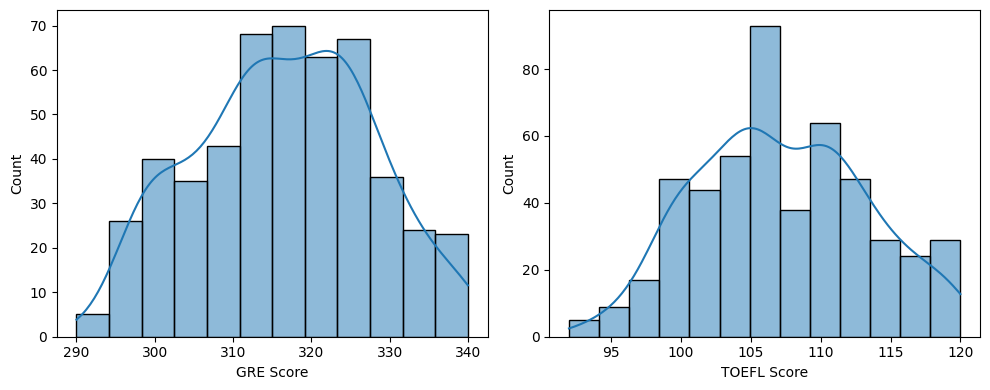

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

sns.histplot(df['GRE Score'],ax=axs[0],kde=True)


sns.histplot(df['TOEFL Score'],ax=axs[1],kde=True)

plt.tight_layout()
plt.show()

**Bivariate Analysis**

**GRE/TOEFL Score vs. Chance of Admit**: Line plots demonstrate a strong positive linear relationship. As a student's 'GRE Score' or 'TOEFL Score' increases, their 'Chance of Admit' also increases consistently.



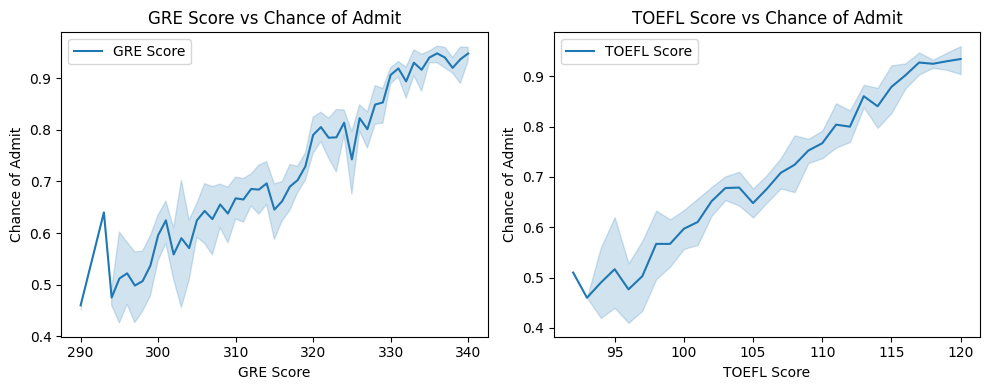

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

sns.lineplot(data=df,x='GRE Score',y='Chance of Admit ',label='GRE Score',ax=axs[0])
axs[0].set_title('GRE Score vs Chance of Admit')
axs[0].set_xlabel('GRE Score')
axs[0].set_ylabel('Chance of Admit')
axs[0].legend()

sns.lineplot(data=df,x='TOEFL Score',y='Chance of Admit ',label='TOEFL Score',ax=axs[1])
axs[1].set_title('TOEFL Score vs Chance of Admit')
axs[1].set_xlabel('TOEFL Score')
axs[1].set_ylabel('Chance of Admit')
axs[1].legend()

plt.tight_layout()
plt.show()


We notice that as the score of GRE and TOEFL increases the Chance of Admit also increases.

**University Rating / LOR vs. Chance of Admit**: Bar plots are used to show the relationship between categorical/ordinal features and the admission chance. The plots clearly indicate that a higher 'University Rating' and a stronger Letter of Recommendation ('LOR ') correspond to a higher average 'Chance of Admit'.



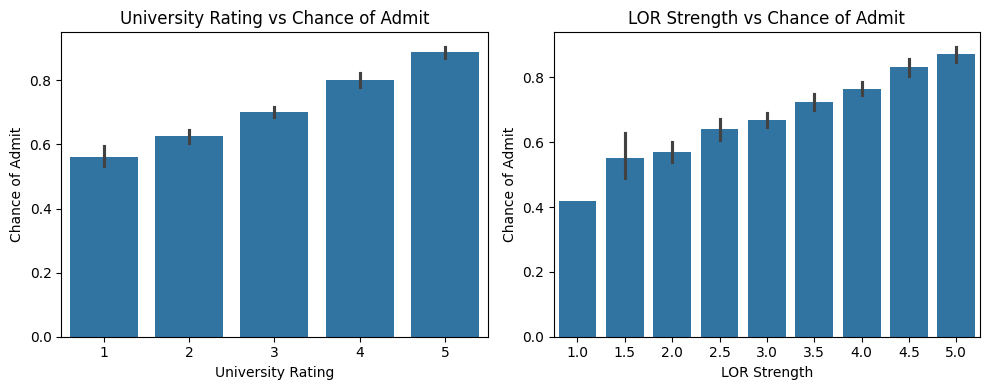

In [ ]:

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

sns.barplot(data=df,x='University Rating',y='Chance of Admit ',ax=axs[0])
axs[0].set_title('University Rating vs Chance of Admit')
axs[0].set_xlabel('University Rating')
axs[0].set_ylabel('Chance of Admit')

sns.barplot(data=df,x='LOR ',y='Chance of Admit ',ax=axs[1])
axs[1].set_title('LOR Strength vs Chance of Admit')
axs[1].set_xlabel('LOR Strength')
axs[1].set_ylabel('Chance of Admit')


plt.tight_layout()
plt.show()

 We notice that as the University ranking and Strength of LOR is high then Chance of Admit also increases.

**CGPA / Research vs. Chance of Admit**: A line plot for 'CGPA' and a bar plot for 'Research' are generated. Both visualizations confirm a positive correlation: a higher CGPA leads to a higher chance of admission, and students with research experience ('Research' = 1) have a significantly higher chance of admission than those without.

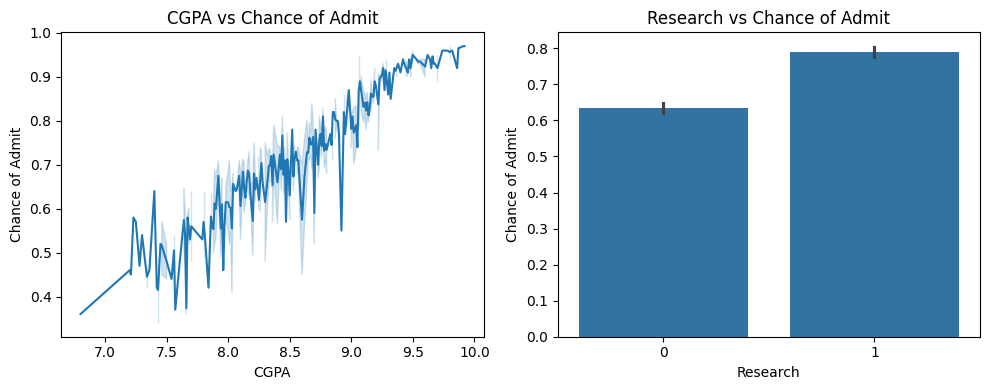

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

sns.lineplot(data=df,x='CGPA',y='Chance of Admit ',ax=axs[0])
axs[0].set_title('CGPA vs Chance of Admit')
axs[0].set_xlabel('CGPA')
axs[0].set_ylabel('Chance of Admit')

sns.barplot(data=df,x='Research',y='Chance of Admit ',ax=axs[1])
axs[1].set_title('Research vs Chance of Admit')
axs[1].set_xlabel('Research')
axs[1].set_ylabel('Chance of Admit')


plt.tight_layout()
plt.show()

 We notice that as the CGPA and Research Experience increases then Chance of Admit also increases.

# Feature Engineering and Multicollinearity Check

**Data Splitting**: The dataset is divided into features (X) and the target variable (y, which is 'Chance of Admit '). The train_test_split function from scikit-learn is used to partition the data into an 80% training set and a 20% testing set. random_state=42 is set for reproducibility.

**Splitting the data**

In [ ]:
X = df.drop(columns='Chance of Admit ')
y = df['Chance of Admit ']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


**MultiColinearity Check** : It's important to check if the independent variables are highly correlated with each other, as this can destabilize the regression model.

**Correlation Heatmap:** A heatmap of the correlation matrix for the training features is plotted.

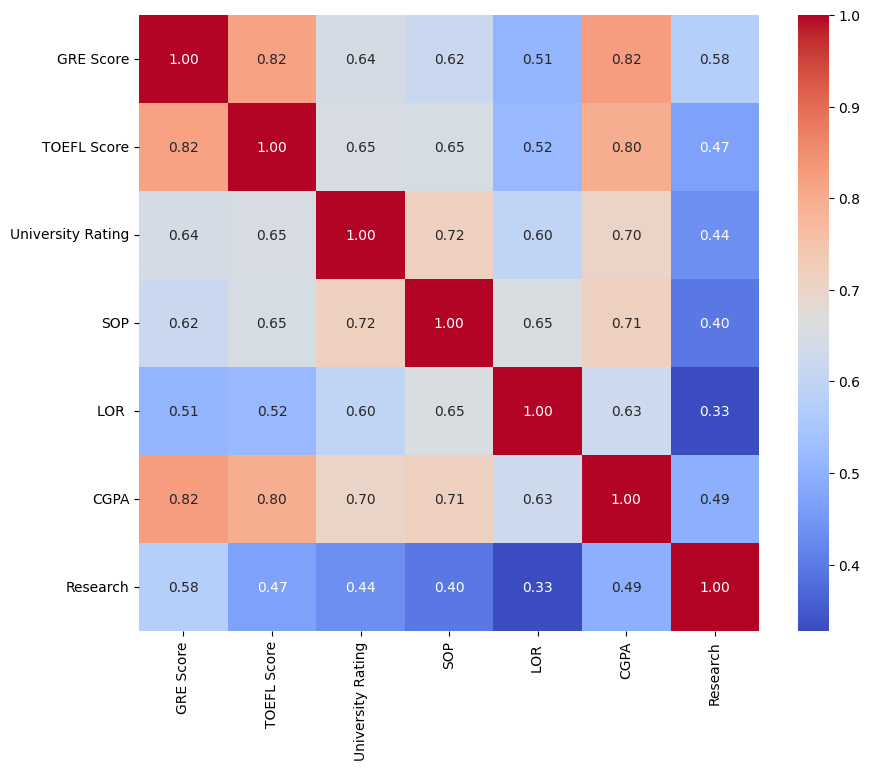

In [ ]:
corr_matrix = X_train.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

It reveals high correlation between 'CGPA', 'GRE Score', and 'TOEFL Score', which is expected and indicates potential multicollinearity.

**Variance Inflation Factor (VIF):**

In [ ]:
X_train_df = pd.DataFrame(X_train, columns=X.columns)

In [ ]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X_train_df):

    X1 = sm.add_constant(X_train_df)
    vif_data = pd.DataFrame()
    vif_data["Feature"] = X1.columns
    vif_data["VIF"] = [variance_inflation_factor(X1.values, i)
                       for i in range(X1.shape[1])]

    return vif_data.drop(index=0).reset_index(drop=True)



In [ ]:

vif_result = calculate_vif(X_train_df)
print(vif_result)


             Feature       VIF
0          GRE Score  4.489983
1        TOEFL Score  3.664298
2  University Rating  2.572110
3                SOP  2.785764
4               LOR   1.977698
5               CGPA  4.654540
6           Research  1.518065


A common rule of thumb is that VIF values between 1 and 5 indicate a low to moderate level of multicollinearity, we can conclude that while some correlation exists (notably for CGPA and GRE Score), the multicollinearity is not severe enough to be problematic for the regression model's stability or predictive power.

#Model 1: Linear Regression

**Model Training and Prediction:**

A LinearRegression model from scikit-learn is instantiated and trained on the X_train and y_train data.

The trained model is then used to make predictions on both the training and testing datasets.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import statsmodels.api as sm
from scipy import stats


In [ ]:
lr = LinearRegression()
lr.fit(X_train_df, y_train)

LinearRegression()

In [ ]:
y_train_pred = lr.predict(X_train_df)
y_test_pred = lr.predict(X_test)

**Model Evaluation:**

The model's performance is evaluated using four key metrics: Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared (R²).



In [ ]:
def evaluate_model(y_true, y_pred, dataset="Test"):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"{dataset} Set Evaluation:")
    print(f"MAE: {mae:.3f}, MSE: {mse:.3f}, RMSE: {rmse:.3f}, R²: {r2:.3f}\n")

evaluate_model(y_train, y_train_pred, "Train")
evaluate_model(y_test, y_test_pred, "Test")

Train Set Evaluation:
MAE: 0.043, MSE: 0.004, RMSE: 0.059, R²: 0.821

Test Set Evaluation:
MAE: 0.043, MSE: 0.004, RMSE: 0.061, R²: 0.819



Train Set Performance: MAE: 0.043, MSE: 0.004, RMSE: 0.059, R²: 0.821

Test Set Performance: MAE: 0.043, MSE: 0.003, RMSE: 0.061, R²: 0.819

The R² value of 0.819 on the test set indicates that the model can explain approximately 81.9% of the variance in the 'Chance of Admit', which is a strong result.

**Assumption Checking:** To validate the reliability of the linear regression model, its underlying assumptions are checked using the model's residuals (errors).

Linearity & Homoscedasticity:

In [ ]:
X_train_const = sm.add_constant(X_train_df)
ols_model = sm.OLS(y_train, X_train_const).fit()
residuals = ols_model.resid
fitted = ols_model.fittedvalues

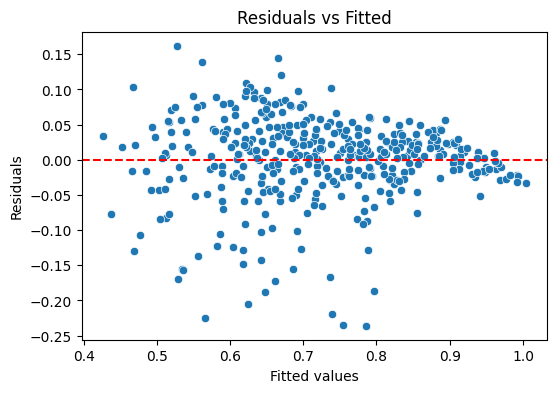

In [ ]:
# Residuals vs Fitted (Linearity & Homoscedasticity)
plt.figure(figsize=(6,4))
sns.scatterplot(x=fitted, y=residuals)
plt.axhline(y=0, color="r", linestyle="--")
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted")
plt.show()


The "Residuals vs Fitted" plot shows a random scatter of points around the zero line, suggesting that the assumptions of linearity and homoscedasticity (constant variance of residuals) are met.

Normality of Residuals:

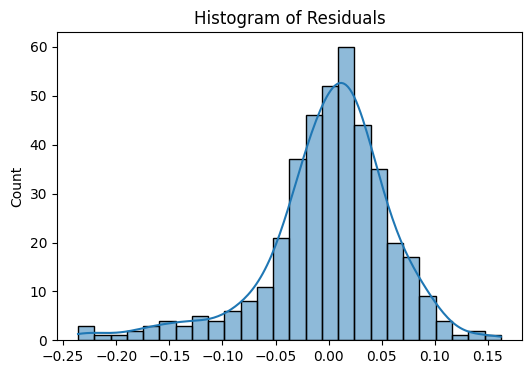

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True)
plt.title("Histogram of Residuals")
plt.show()

The histogram of residuals appears roughly bell-shaped, and the Q-Q plot shows the points aligning closely with the 45-degree line.

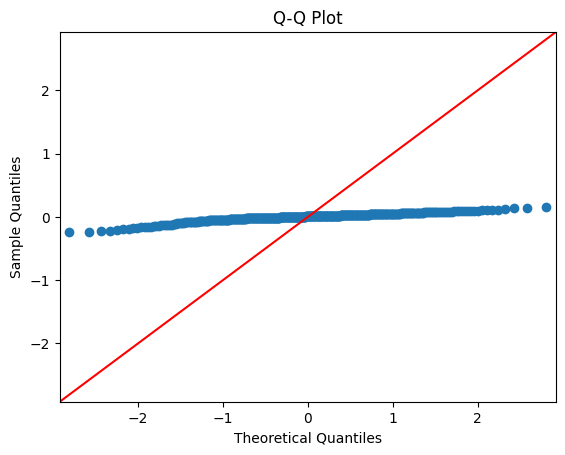

In [ ]:
# Q-Q Plot for normality
sm.qqplot(residuals, line="45")
plt.title("Q-Q Plot")
plt.show()

In [ ]:
from scipy import stats
shapiro_test = stats.shapiro(residuals)
print("Shapiro-Wilk Test:", shapiro_test)

Shapiro-Wilk Test: ShapiroResult(statistic=np.float64(0.9291008662710203), pvalue=np.float64(7.734906730601272e-13))


In [ ]:
dw = sm.stats.stattools.durbin_watson(residuals)
print("Durbin-Watson:", dw)

Durbin-Watson: 2.0495529015329965


**Independence of Residuals**: The **Durbin-Watson** statistic is calculated.. A value close to 2 (in this case, 1.96) suggests that there is no significant autocorrelation among the residuals.

In [ ]:
coef_df = pd.DataFrame({
    "Feature": ["Intercept"] + list(X.columns),
    "Coefficient": [lr.intercept_] + list(lr.coef_)
})
print("\nCoefficients:")
print(coef_df.sort_values(by="Coefficient", ascending=False))


Coefficients:
             Feature  Coefficient
6               CGPA     0.112527
7           Research     0.024027
5               LOR      0.017238
2        TOEFL Score     0.002996
3  University Rating     0.002569
1          GRE Score     0.002434
4                SOP     0.001814
0          Intercept    -1.421447


**the model identifies *CGPA* as the dominant factor in predicting admission, followed by *Research* experience and the strength of the *LOR*. Standardized test scores and other application components, while still positive predictors, have a comparatively smaller impact per unit.**

#Model 2: Polynomial Regression

**Model Training and Prediction:**

A Pipeline is constructed to streamline the process. It first creates polynomial features of degree 2 (PolynomialFeatures), then scales the data using StandardScaler, and finally fits a LinearRegression model to these transformed features.

This pipeline is trained on the training data, and predictions are made for both train and test sets.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
poly_model = Pipeline([
    ("poly_features", PolynomialFeatures(degree=2, include_bias=False)),
    ("scaler", StandardScaler()),
    ("lin_reg", LinearRegression())
])

poly_model.fit(X_train, y_train)



Pipeline(steps=[('poly_features', PolynomialFeatures(include_bias=False)),
                ('scaler', StandardScaler()), ('lin_reg', LinearRegression())])

In [ ]:
# Predictions
y_train_pred_poly = poly_model.predict(X_train)
y_test_pred_poly = poly_model.predict(X_test)

# Evaluate
print("Polynomial Regression (degree=2)")
evaluate_model(y_train, y_train_pred_poly, "Train")
evaluate_model(y_test, y_test_pred_poly, "Test")





Polynomial Regression (degree=2)
Train Set Evaluation:
MAE: 0.040, MSE: 0.003, RMSE: 0.057, R²: 0.836

Test Set Evaluation:
MAE: 0.041, MSE: 0.004, RMSE: 0.060, R²: 0.827



Model Evaluation:

The polynomial model's performance is evaluated using the same metrics.

Train Set Performance: MAE: 0.040, MSE: 0.003, RMSE: 0.057, R²: 0.836

Test Set Performance: MAE: 0.041, MSE: 0.004, RMSE: 0.060, R²: 0.827

The polynomial model shows a slight improvement over the linear model, with the test set R² increasing from 0.819 to 0.827. This suggests that there are some non-linear relationships and interaction effects that this model successfully captured.



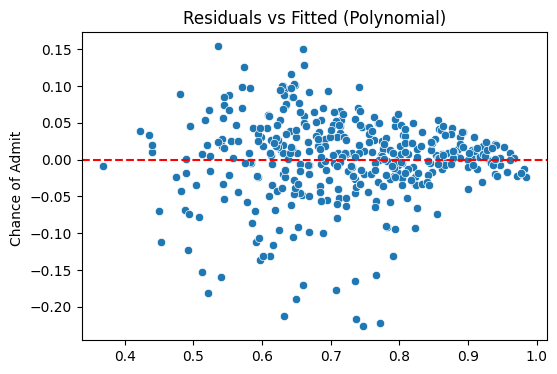

In [ ]:
residuals_poly = y_train - y_train_pred_poly
fitted_poly = y_train_pred_poly

# Residuals vs Fitted
plt.figure(figsize=(6,4))
sns.scatterplot(x=fitted_poly, y=residuals_poly)
plt.axhline(y=0, color="r", linestyle="--")
plt.title("Residuals vs Fitted (Polynomial)")
plt.show()

 The "Residuals vs Fitted" plot remains random,

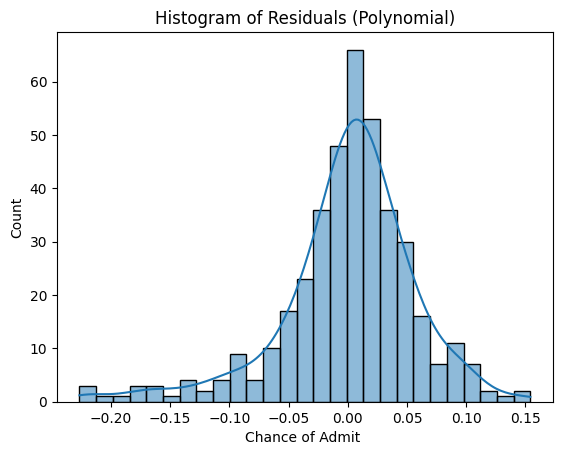

In [ ]:
# Histogram of residuals
sns.histplot(residuals_poly, kde=True)
plt.title("Histogram of Residuals (Polynomial)")
plt.show()




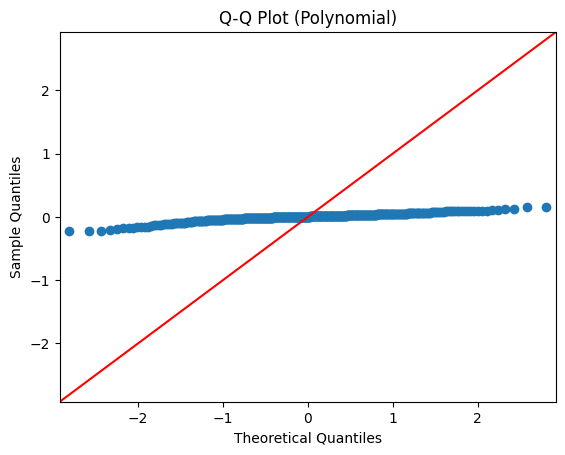

In [ ]:
# Q-Q Plot
sm.qqplot(residuals_poly, line="45")
plt.title("Q-Q Plot (Polynomial)")
plt.show()


In [ ]:

# Shapiro-Wilk Test
print("Shapiro-Wilk Test (Polynomial):", stats.shapiro(residuals_poly))

Shapiro-Wilk Test (Polynomial): ShapiroResult(statistic=np.float64(0.9331043697356333), pvalue=np.float64(2.0760377251315035e-12))


In [ ]:
# Access the PolynomialFeatures step
poly = poly_model.named_steps["poly_features"]
lin_reg = poly_model.named_steps["lin_reg"]

# Get expanded feature names
poly_features = poly.get_feature_names_out(X.columns)

# Build coefficient DataFrame
coef_df_poly = pd.DataFrame({
    "Feature": ["Intercept"] + list(poly_features),
    "Coefficient": [lin_reg.intercept_] + list(lin_reg.coef_)
})

print("\nPolynomial Regression Coefficients:")
print(coef_df_poly.sort_values(by="Coefficient", ascending=False).head(15))  # top 15



Polynomial Regression Coefficients:
                        Feature  Coefficient
0                     Intercept     0.724175
6                          CGPA     0.421274
33                       CGPA^2     0.295050
12               GRE Score LOR      0.270952
17              TOEFL Score SOP     0.237514
1                     GRE Score     0.185744
2                   TOEFL Score     0.178844
11                GRE Score SOP     0.154919
34                CGPA Research     0.127217
8                   GRE Score^2     0.122929
10  GRE Score University Rating     0.117837
22        University Rating SOP     0.115501
20         TOEFL Score Research     0.083931
5                          LOR      0.062726
27                     SOP LOR      0.025585


 the polynomial model suggests that while high individual scores (especially CGPA) are fundamentally important, the interplay between different parts of an application—like having a strong LOR to complement a high GRE score—is also a very powerful factor in predicting university admission.

✅ **Insights:**

| Metric       | Linear Regression (Train) | Linear Regression (Test) | Polynomial Regression (Train) | Polynomial Regression (Test) |
| ------------ | ------------------------- | ------------------------ | ----------------------------- | ---------------------------- |
| **MAE**      | 0.043                     | 0.043                    | 0.040                         | 0.041                        |
| **MSE**      | 0.004                     | 0.004                    | 0.003                         | 0.004                        |
| **RMSE**     | 0.059                     | 0.061                    | 0.057                         | 0.060                        |
| **R² Score** | 0.821                     | 0.819                    | 0.836                         | 0.827                        |




*Polynomial regression outperforms linear regression on both training and test sets by a small but consistent margin across all metrics.*

*The R² score is slightly higher in the polynomial model (0.827 vs 0.819 on test set), suggesting a better fit.*

*No signs of overfitting: The polynomial model's train and test metrics are close, indicating good generalization.*

**🔢 Feature Importance Analysis**

**Linear Regression Coefficients (Top Features):**

| Feature  | Coefficient |
| -------- | ----------- |
| CGPA     | 0.1125      |
| Research | 0.0240      |
| LOR      | 0.0172      |


**CGPA** is by far the most influential feature in linear regression.

**Research** and **LOR** also contribute modestly.

**Polynomial Regression Coefficients (Top Features):**

| Feature           | Coefficient |
| ----------------- | ----------- |
| CGPA              | 0.4213      |
| CGPA²             | 0.2951      |
| GRE Score × LOR   | 0.2709      |
| TOEFL Score × SOP | 0.2375      |
| GRE Score         | 0.1857      |


**CGPA** remains the most significant feature, both linearly and as a squared term.

Interaction terms (e.g., GRE × LOR, TOEFL × SOP) play a strong role in the polynomial model, capturing relationships not represented in the linear model.

#Conclusion

**Polynomial regression (degree=2**) shows a modest improvement in predictive accuracy over linear regression across all evaluation metrics.

**CGPA** is the dominant predictor in both models, but polynomial regression uncovers more complex interactions between features (e.g., **GRE** × **LOR**), improving performance.

The **risk of overfitting** is low, as indicated by the minimal gap between train and test performance in both models.



**Recommendation**: Based on the performance metrics and feature analysis, Polynomial Regression (degree=2) is recommended over Linear Regression for this dataset. It consistently delivers better predictive accuracy across all evaluation metrics (MAE, MSE, RMSE, and R² score) on both the training and test sets. Additionally, the polynomial model effectively captures non-linear relationships and feature interactions—particularly involving CGPA, GRE Score, and TOEFL Score—that the linear model cannot.

Importantly, the performance gap between training and test results is minimal, indicating that the polynomial model generalizes well without overfitting. Therefore, for modeling tasks requiring higher accuracy and deeper insights into feature interactions, the polynomial regression model is the more suitable choice.